EchoVision: An Intelligent Image Narration System for Accessibility Support
Problem Statement

In real-world applications such as assistive technology for visually impaired individuals, smart surveillance systems, and automated content generation tools, systems must understand visual data, convert it into meaningful text, and generate natural speech output.

This project builds a multimodal AI system integrating:
●	Computer Vision (Object Detection)
●	Natural Language Generation (Text Conversion)
●	Speech Synthesis (Text-to-Speech)

In this task you are supposed to implement both the Approaches mentioned below:
Approach 1 (Using Only HF): Using Hugging Face Transformers pipelines for object detection and Speech Synthesis.
Approach 2 (Using Gemini and HF): Using Google GenAI library for image captioning and HuggingFace Transformers pipeline for Speech Synthesis.


 

Approach 1: Using Hugging Face Transformers pipelines
System Workflow

Input Image → Object Detection → Label Extraction & Counting → Text Generation → Text-to-Speech → Audio Output
Step-by-Step Implementation
Step 1: Object Detection from Image

Objective: Detect objects present in an image and extract labels and confidence scores.
Recommended Models:
●	facebook/detr-resnet-50 (Accurate Transformer-based detector)
●	hustvl/yolos-tiny (Lightweight detector)
●	google/owlvit-base-patch32 (Open-vocabulary detection)[

Step 2: Extract Labels and Convert to Text

Objective: Count occurrences of detected objects and convert them into meaningful natural language text. You have to write python logic for this step.
Step 3: Text-to-Speech (TTS)

Objective: Convert the generated descriptive text into natural speech audio.
Recommended Models:
●	suno/bark-small
●	microsoft/speecht5_tts
●	facebook/fastspeech2-en-ljspeech
 

System Architecture Overview

Input Image
↓
Object Detection Model (DETR/YOLOS)
↓
Label Extraction & Counting
↓
Text Generation Module
↓
Text-to-Speech Model
↓
Audio Output


 

Approach 2: using Google GenAI library and HuggingFace Transformers pipeline 
System Overview
Input Image → Image Captioning for object detection → Generated text → Text-to-Speech → Audio Output

Step-by-Step Process
Step 1: Image Captioning using Google GenAI SDK
Objective: Generate a detailed and accessibility-focused caption describing the image.
Instead of detecting isolated objects, the model:
●	Understands the entire scene
●	Identifies relationships between objects
●	Describes actions and context
●	Produces natural, human-like language
Recommended Models: gemini-3-flash-preview 
While using the given gemini model, provide the following system prompt:
"You are a helpful AI Assistant. Given an image perform object detection and provide a text output which contains the information about the labels detected and their counts."
Step 2: Text Processing (Optional Enhancement)
Objective: Prepare the generated caption for speech synthesis.
Possible enhancements:
●	Remove unnecessary symbols
●	Control length (brief/detailed mode)
●	Adjust tone (formal/informal)
●	Add introductory phrase (e.g., "Here is what I see in the image...")

Step 3: Text-to-Speech (TTS)

Objective: Convert the generated descriptive text into natural speech audio.
Recommended Models:
●	suno/bark-small
●	microsoft/speecht5_tts
●	facebook/fastspeech2-en-ljspeech
System Architecture Overview

Input Image
↓
Object Detection using Vision Model (Google GenAI)
↓
Generated Text
↓
Text-to-Speech Model
↓
Audio Output

 
Example Use Case Scenario

Scenario: Assistive AI tool for visually impaired users.

Sample Image: A park scene containing 3 persons, 1 bicycle, and 2 dogs.

Generated Text: The image contains 3 persons, 1 bicycle, and 2 dogs.

Output: Audio narration of the generated sentence.
Learning Outcomes
●	Understanding transformer-based object detection
●	Working with Hugging Face pipelines
●	Multimodal AI system integration
●	Natural language generation techniques
●	Text-to-speech synthesis
●	End-to-end AI system development
Conclusion
This project demonstrates the integration of Vision, Language, and Speech using Transformer-based pipelines. It provides hands-on experience in designing and implementing real-world multimodal AI systems.

Submission Link
Click here to submit your work.


In [1]:
! pip install Pillow matplotlib timm

     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     -------------- ----------------------- 20.5/52.8 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 687.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     -------------------------------------- 116.4/116.4 kB 7.1 MB/s eta 0:00:00
  Using cached numpy-2.4.2-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached torch-2.10.0-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached torchvision-0.25.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached huggingface_hub-1.4.1-py3-none-any.whl.metadata (13 kB)
  Using cached safetensors-0.7.0-cp38-abi3-win_amd64.whl.metadata (4.2 kB)
  Using cached fsspec-2026.2.0-py3-none-any.whl.metadata (10 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl.metadata (5.0 kB)
  Using cached shellingham-1.5.4-py2.py3-none-an


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install torch torchvision


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip install transformers tokenizers accelerate

  Using cached transformers-5.1.0-py3-none-any.whl.metadata (31 kB)
  Using cached tokenizers-0.22.2-cp39-abi3-win_amd64.whl.metadata (7.4 kB)
  Using cached accelerate-1.12.0-py3-none-any.whl.metadata (19 kB)
  Using cached regex-2026.1.15-cp312-cp312-win_amd64.whl.metadata (41 kB)
Using cached transformers-5.1.0-py3-none-any.whl (10.3 MB)
Using cached tokenizers-0.22.2-cp39-abi3-win_amd64.whl (2.7 MB)
Using cached accelerate-1.12.0-py3-none-any.whl (380 kB)
Using cached regex-2026.1.15-cp312-cp312-win_amd64.whl (277 kB)



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch

print(torch.__version__)

2.10.0+cpu


In [5]:
import transformers

print(transformers.__version__)

5.1.0


In [6]:
from accelerate import Accelerator

acc = Accelerator()
print(acc.device)

cpu


In [7]:
import gc
gc.collect()

66

In [8]:
from transformers.pipelines import SUPPORTED_TASKS
print(SUPPORTED_TASKS.keys())

dict_keys(['audio-classification', 'automatic-speech-recognition', 'text-to-audio', 'feature-extraction', 'text-classification', 'token-classification', 'question-answering', 'table-question-answering', 'visual-question-answering', 'document-question-answering', 'fill-mask', 'text-generation', 'zero-shot-classification', 'zero-shot-image-classification', 'zero-shot-audio-classification', 'image-classification', 'image-feature-extraction', 'image-segmentation', 'image-text-to-text', 'object-detection', 'zero-shot-object-detection', 'depth-estimation', 'video-classification', 'mask-generation', 'image-to-image', 'keypoint-matching', 'any-to-any'])


In [9]:
! pip install Pillow matplotlib timm


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import torch
from transformers import pipeline

In [32]:
detector = pipeline(
    task="object-detection",
    model="facebook/detr-resnet-50"
)

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

DetrForObjectDetection LOAD REPORT from: facebook/detr-resnet-50
Key                                                            | Status     | Details
---------------------------------------------------------------+------------+--------
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |        
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |        
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |        
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |        

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [13]:
image_path = "images/traffic.jpeg"
image = Image.open(image_path)

plt.imshow(image)
plt.axis("off")

NameError: name 'Image' is not defined

In [14]:
from PIL import Image

In [15]:
image_path = "images/traffic.jpeg"
image = Image.open(image_path)

plt.imshow(image)
plt.axis("off")

NameError: name 'plt' is not defined

In [33]:
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(799.5), np.float64(447.5), np.float64(-0.5))

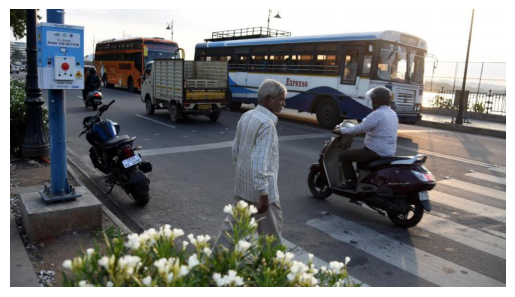

In [34]:
image_path = "images/traffic.jpeg"
image = Image.open(image_path)

plt.imshow(image)
plt.axis("off")

In [35]:
detections = detector(image)

In [36]:
detections

[{'score': 0.9979919195175171,
  'label': 'motorcycle',
  'box': {'xmin': 112, 'ymin': 145, 'xmax': 228, 'ymax': 319}},
 {'score': 0.9991317391395569,
  'label': 'motorcycle',
  'box': {'xmin': 479, 'ymin': 182, 'xmax': 688, 'ymax': 354}},
 {'score': 0.8285350203514099,
  'label': 'car',
  'box': {'xmin': 0, 'ymin': 87, 'xmax': 12, 'ymax': 103}},
 {'score': 0.524188220500946,
  'label': 'car',
  'box': {'xmin': 0, 'ymin': 89, 'xmax': 7, 'ymax': 104}},
 {'score': 0.9976523518562317,
  'label': 'truck',
  'box': {'xmin': 208, 'ymin': 78, 'xmax': 353, 'ymax': 183}},
 {'score': 0.9971945285797119,
  'label': 'motorcycle',
  'box': {'xmin': 119, 'ymin': 126, 'xmax': 152, 'ymax': 164}},
 {'score': 0.9984456896781921,
  'label': 'bus',
  'box': {'xmin': 131, 'ymin': 44, 'xmax': 275, 'ymax': 130}},
 {'score': 0.9992173910140991,
  'label': 'person',
  'box': {'xmin': 354, 'ymin': 112, 'xmax': 449, 'ymax': 383}},
 {'score': 0.9974865913391113,
  'label': 'person',
  'box': {'xmin': 118, 'ymin':

In [20]:
confidence_threshold = 0.7

filtered_labels = [
    obj['label'] for obj in detections
    if obj['score'] > confidence_threshold
]

label_counts = Counter(filtered_labels)

label_counts

NameError: name 'Counter' is not defined

In [37]:
from collections import Counter

In [38]:
confidence_threshold = 0.7

filtered_labels = [
    obj['label'] for obj in detections
    if obj['score'] > confidence_threshold
]

label_counts = Counter(filtered_labels)

label_counts

Counter({'person': 4, 'motorcycle': 3, 'car': 2, 'bus': 2, 'truck': 1})

In [39]:
def generate_description(label_counts):
    if not label_counts:
        return "No significant things were detected, Area seems to be clear, But I can be Wrong"
    
    description_parts = []
    
    for label, count in label_counts.items():
        if count == 1:
            description_parts.append(f"one {label}")
        else:
            description_parts.append(f"{count} {label}s")
    
    description = "The image contains " + ", ".join(description_parts[:-1])
    
    if len(description_parts) > 1:
        description += " and " + description_parts[-1] + "."
    else:
        description = "The image contains " + description_parts[0] + "."
    
    return description

generated_text = generate_description(label_counts)

print(generated_text)

The image contains 3 motorcycles, 2 cars, one truck, 2 buss and 4 persons.


In [40]:
tts = pipeline(
    task="text-to-speech",
    model="suno/bark-small",
)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/542 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.1.weight to fine_acoustics.lm_heads.0.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.2.weight to fine_acoustics.lm_heads.1.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.3.weight to fine_acoustics.lm_heads.2.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_l

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

speaker_embeddings_path.json: 0.00B [00:00, ?B/s]

In [41]:
print(generated_text)

The image contains 3 motorcycles, 2 cars, one truck, 2 buss and 4 persons.


In [43]:
speech = tts(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
Both `max_new_tokens` (=768) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

KeyboardInterrupt: 

In [44]:
speech = tts(
    generated_text,
    generate_kwargs={
        "max_new_tokens": 100 
    }
)

Passing `generation_config` together with generation-related arguments=({'min_eos_p', 'max_new_tokens', 'return_dict_in_generate'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


TypeError: transformers.generation.utils.GenerationMixin.generate() got multiple values for keyword argument 'max_new_tokens'

In [45]:
speech = tts(generated_text)

audio = speech["audio"]
sampling_rate = speech["sampling_rate"]

import soundfile as sf
sf.write("output.wav", audio, sampling_rate)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
Both `max_new_tokens` (=768) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

ModuleNotFoundError: No module named 'soundfile'

In [46]:
speech = tts(generated_text)

audio = speech["audio"]
sampling_rate = speech["sampling_rate"]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
Both `max_new_tokens` (=768) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

In [47]:
from IPython.display import Audio as IPythonAudio


In [49]:
print(sampling_rate)


24000


In [53]:
IPythonAudio(
    audio,
    rate=speech["sampling_rate"]
)